In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qnlmodels.klopfenstein_taper import KlopfensteinTaper

/Users/elias/Desktop/School/Quantum/AQT/TWPA Project/qnlmodels/klopfenstein_taper.py:29: RuntimeWarning: invalid value encountered in scalar divide
  result, _ = sp.integrate.quad(lambda y: sp.special.iv(1, A*np.sqrt(1-y**2)) / (A*np.sqrt(1-y**2)), 0, z)
/Users/elias/Desktop/School/Quantum/AQT/TWPA Project/qnlmodels/klopfenstein_taper.py:29: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = sp.integrate.quad(lambda y: sp.special.iv(1, A*np.sqrt(1-y**2)) / (A*np.sqrt(1-y**2)), 0, z)
/Users/elias/Desktop/School/Quantum/AQT/TWPA Project/qnlmodels/klopfenstein_taper.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = sp.integrate.quad(lambda y: sp.special.iv(1, A*np.sqrt(1-y**2)) / (A*np.sqrt(1-y**2)), 0, z)


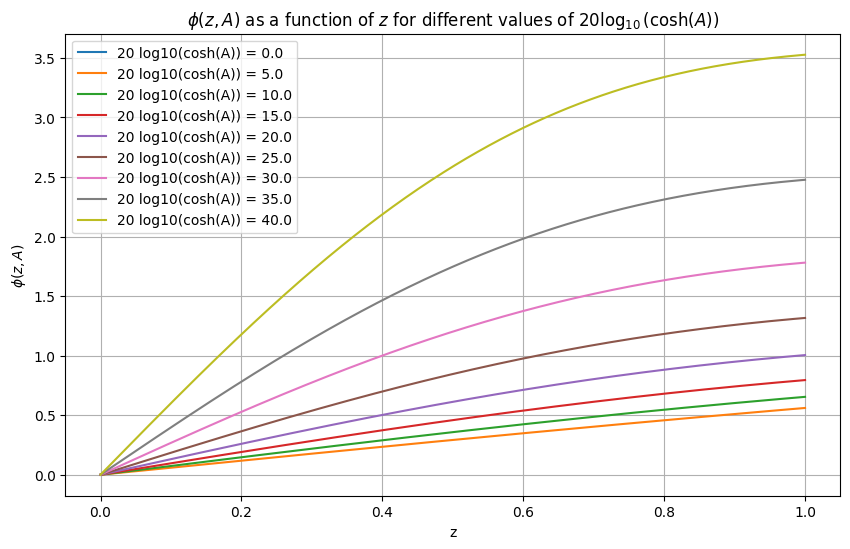

In [ ]:
A_values_db = [0, 5, 10, 15, 20, 25, 30, 35, 40]
A_values = [np.arccosh(10**(db/20)) for db in A_values_db]
z_values = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 6))

for A in A_values:
    taper = KlopfensteinTaper(A)
    phi_values = [taper.phi(z, A) for z in z_values]
    plt.plot(z_values, phi_values, label=f'20 log10(cosh(A)) = {20*np.log10(np.cosh(A)):.1f}')

plt.xlabel('z')
plt.ylabel(r'$\phi(z, A)$')
plt.title(r'$\phi(z, A)$ as a function of $z$ for different values of $20 \log_{10} (\cosh(A))$')
plt.legend()
plt.grid(True)
plt.show()

COSH A (dB) = 20.8278537031645
Initial reflection rho0 = 0.2653141255310852
A = 3.088969904844603


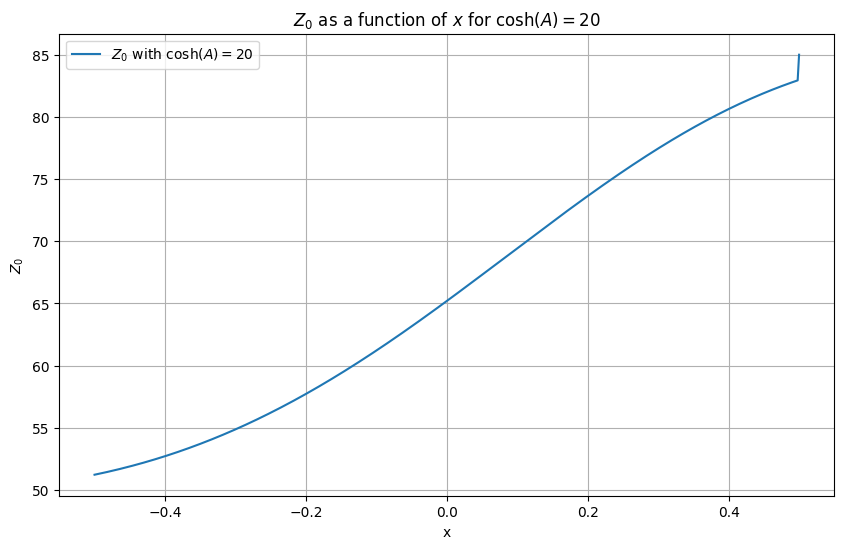

In [ ]:
# Parameters
Z1 = 50
Z2 = 85
l = 1  # unit length of the taper
A = np.arccosh(11)  # cosh(A) = 20
print(f"COSH A (dB) = {20*np.log10(np.cosh(A))}")

print(r'Initial reflection rho0 =', f"{np.log(Z2/Z1)/2}")
print(f"A = {A}")
# Create an instance of KlopfensteinTaper with the calculated A
taper = KlopfensteinTaper(A)

# Generate x values from -l/2 to l/2
x_values = np.linspace(-l/2, l/2, 500)
ln_Z0_values = np.exp([taper.ln_Z0(Z1, Z2, l, x) for x in x_values])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, ln_Z0_values, label=r'$Z_0$ with $\cosh(A) = 20$')

plt.xlabel('x')
plt.ylabel(r'$Z_0$')
plt.title(r'$Z_0$ as a function of $x$ for $\cosh(A) = 20$')
plt.legend()
plt.grid(True)
plt.show()

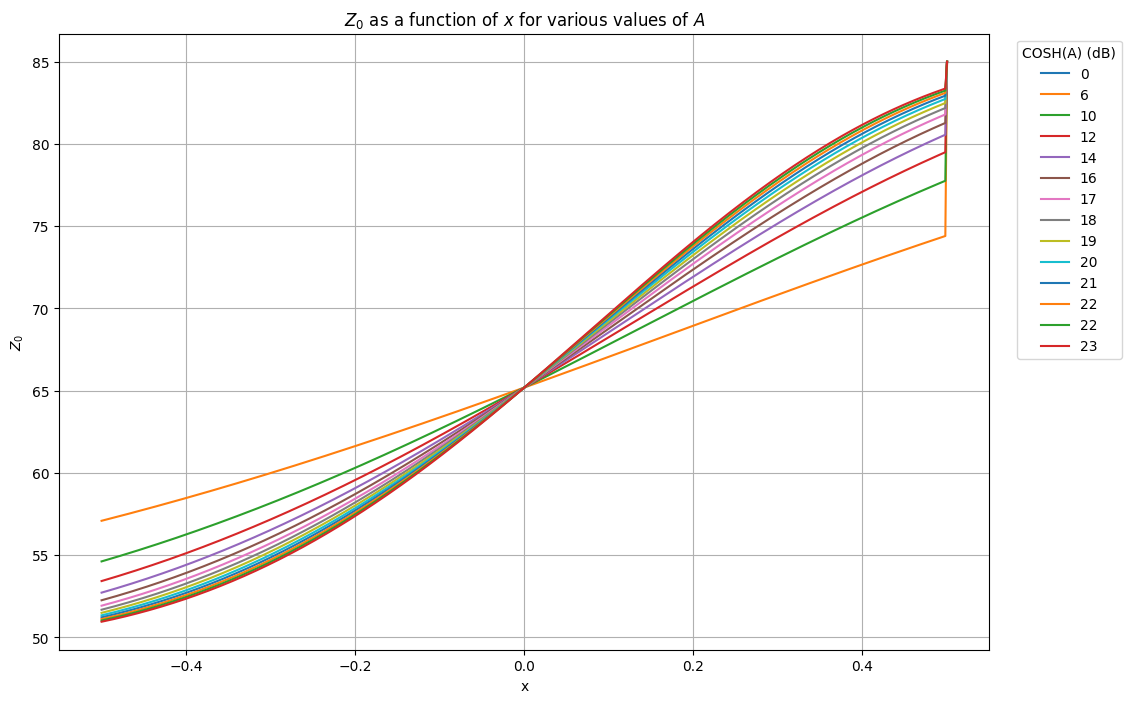

In [ ]:
# Plotting for various values of A
plt.figure(figsize=(12, 8))
A_values = np.arccosh(np.arange(1, 15, 1))

for A in A_values:
    taper = KlopfensteinTaper(A)
    ln_Z0_values = np.exp([taper.ln_Z0(Z1, Z2, l, x) for x in x_values])
    plt.plot(x_values, ln_Z0_values, label=f'{round(20*np.log10(np.cosh(A)))}')

plt.xlabel('x')
plt.ylabel(r'$Z_0$')
plt.title(r'$Z_0$ as a function of $x$ for various values of $A$')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title="COSH(A) (dB)")
plt.grid(True)
plt.show()

/Users/elias/Desktop/School/Quantum/AQT/TWPA Project/qnlmodels/klopfenstein_taper.py:34: RuntimeWarning: invalid value encountered in sqrt
  return np.log(Z2 / Z1) / 2 / np.cosh(self.A) * np.cos(np.sqrt((B*l)**2-self.A**2))


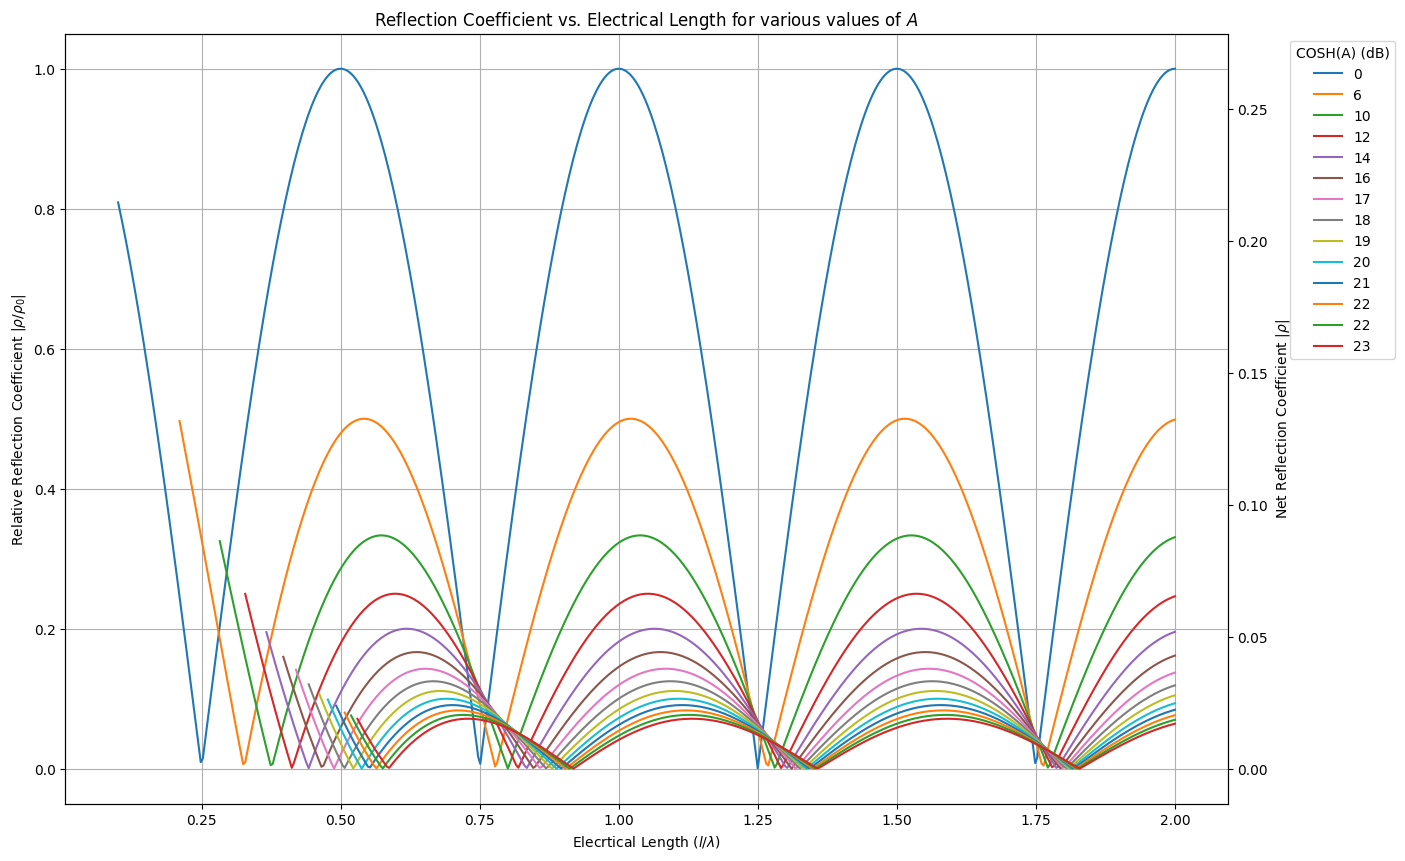

In [ ]:
wavelength = 1  # Wavelength
B = 2 * np.pi / wavelength

# Generate lB values from 0.1 to 10
lB_values = np.linspace(0.1*wavelength, 2*wavelength, 500)

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 10))

for A in A_values:
    taper = KlopfensteinTaper(A)
    reflection_coeff_values = [abs(taper.reflection_coeff(Z1, Z2, lB, B) * 2 / np.log(Z2 / Z1)) for lB in lB_values]
    ax1.plot(lB_values / wavelength, reflection_coeff_values, label=f'{round(20 * np.log10(np.cosh(A)))}')

ax1.set_xlabel(r'Elecrtical Length ($l/\lambda$)')
ax1.set_ylabel(r'Relative Reflection Coefficient $|\rho/\rho_0|$')
ax1.set_title(r'Reflection Coefficient vs. Electrical Length for various values of $A$')
ax1.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title="COSH(A) (dB)")
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel(r'Net Reflection Coefficient $|\rho|$')

# Scale the second y-axis
rho0 = 1  # Example value for rho0, adjust according to your needs
ax2.set_ylim(np.array(ax1.get_ylim()) * np.log(Z2 / Z1) / 2)

plt.show()

Potential design approach:
1. Set A based on nessesary relfection coefficient.
2. Estimate lambda from qubit frequencies
3. Set length to rho min

Requires:
1. Constraint on A (< 2 $\pi$ L / $\lambda$)
2. Small wavelength range
3. **Significant length-wavelength ratio**

In [ ]:
# Tapering CPW Utils

